## Missing data - Strategy

In [1]:
import seaborn as sns
# Seaborn is a statistical data visualizer library based on matplotlib


#pandas Dataframe object 
# each column is a key to a pandas series
titanic = sns.load_dataset("titanic")
titanic.head()  # gets the 5 first rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Here we find Series
titanic["survived"]  


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [3]:
type(titanic["survived"])

pandas.core.series.Series

In [4]:
titanic["survived"].value_counts()  # Value counts sees how many survived

0    549
1    342
Name: survived, dtype: int64

In [5]:
titanic["pclass"].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [6]:
# This is a good way to start to get some info


# We see 891 entries
# We analyze at Non-Null Count
# We can see which datatypes

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
titanic["class"].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [8]:
titanic.describe()  
# Här får vi lite sammanfattad statistik. Bra för att få en överblick av datan
#Notera dock att vissa saker kan vara felaktiga och inte helt 100% representiva, så man får kika på det kritiskt


#std = standardavvikelse
# mean = medelvärde

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.isnull().head() # Alla not in numbers(nulls)

#.head() ger oss 5 fösta
#

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [10]:
nans = titanic.isnull().sum() # We make a summary of all columns. # Sum summerar mellan 1-0. True = 1, False = 0
# Survived has 0 nulls
# age has 177 - missing values(?)
nans

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot: xlabel='age', ylabel='Count'>

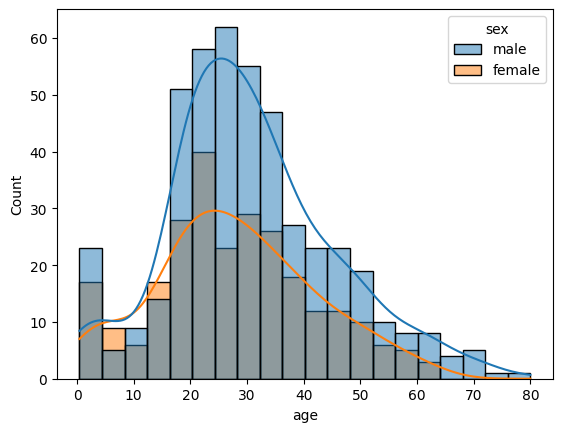

In [11]:
# We plot
sns.histplot(data = titanic, x = "age", hue = "sex", kde=True)
# sns.histplot() Målar ett histogram
# hue är färgen
# kde = kernel density information, är en distrubition, (Vi ser en distrubtion utifrån datan, histogramet)
# titanic importeras som en sns load dataframe -> då blire en pandas dataframe(kompisar)



In [12]:
# case
# a historian (domain expert) advices ut to use median age of corresponding gender to fill in missing ages

# Let us calculate median value

titanic["sex"] == "male"  # we get a bool serie -> if its a man or not


0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: sex, Length: 891, dtype: bool

In [13]:
# case
# a historian (domain expert) advices ut to use median age of corresponding gender to fill in missing ages

titanic[titanic["sex"] == "male"] # We sort out all the males


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
# case
# a historian (domain expert) advices ut to use median age of corresponding gender to fill in missing ages

median_male_age = titanic[titanic["sex"] == "male"]["age"].median() 
# We sort and FILTER out all males, and then we take age for ALL ages
# median() = takes out median age
median_female_age = titanic[titanic["sex"] == "female"]["age"].median() 

median_male_age, median_female_age

(29.0, 27.0)

In [15]:
# We fill/ fylla med 0. Fylla med median female/male age. Men först måste vi hitta innan vi kan fylla upp

titanic.loc[titanic["sex"] == "male", "age"] # Här får jag mina boolenska villkor, titanic av sex = male, age
# i get all ages

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: age, Length: 577, dtype: float64

In [16]:
# Here i fill
titanic.loc[titanic["sex"] == "male", "age"].fillna(median_male_age)

0      22.0
4      35.0
5      29.0
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: age, Length: 577, dtype: float64

In [17]:
# Här tilldelar jag en ny Serie
# Kom ihåg att jag gör allt detta för att ändra i titanic dataframet

titanic.loc[titanic["sex"] == "male", "age"] = titanic.loc[titanic["sex"] == "male", "age"].fillna(median_male_age)

# Här kan vi undersöka om i faktiskt har fyllt i 
titanic.loc[titanic["age"] == 29, "sex"].value_counts()  # Här får vi ett visst antal (144) rows. Sedan får vi ett visst antal med value_counts()


male      137
female      7
Name: sex, dtype: int64

In [18]:
titanic["age"].isnull().sum() # nulls left to fill

53

In [22]:
# kolla att vi bara har female kvar att fylla
titanic.loc[titanic["age"].isnull(), "sex"].value_counts()
# Vi har kört plockat ut alla där vi har null på age, letat i kategori "sex" och kört en value_counts()


# Då måste vi göra en fill för female också så det är ändrat i datasetet

female    53
Name: sex, dtype: int64

In [24]:
# fill in the rest of nans with median female age

titanic["age"] = titanic["age"].fillna(median_female_age) # Here i fill

# Here i check, and i can see "sex" is 0 so thats GOOD
titanic.isnull().sum()

#---> Alternative to code above
#titanic.isnull().sum()["sex"]

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot: xlabel='age', ylabel='Count'>

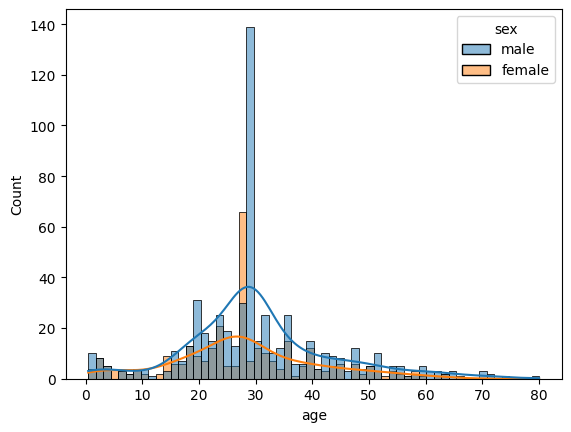

In [27]:
sns.histplot(data = titanic, x = "age", kde = True, hue = "sex", bins = 60) # bins är antalet staplar